In [2]:
from sklearn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3> Загрузка и препроцессинг данных </h3>

In [3]:
train_filename = "cust_class_train.csv"
test_filename = "cust_class_test.csv"

In [4]:
train_data = pd.read_csv(train_filename)
test_data = pd.read_csv(test_filename)

In [5]:
train_data = train_data.set_index("ID")
test_data = test_data.set_index("ID")

In [6]:
train_data.Ever_Married = train_data.Ever_Married.astype('category')
train_data.Graduated = train_data.Graduated.astype('category')
train_data.Profession = train_data.Profession.astype('category')
train_data.Spending_Score = train_data.Spending_Score.astype('category')
train_data.Var_1 = train_data.Var_1.astype('category')
train_data.Segmentation = train_data.Segmentation.astype('category')

In [7]:
drop_rows = train_data[
    (train_data.Age < train_data.Age.quantile(0.005)) | 
    (train_data.Age > train_data.Age.quantile(0.995))].index

In [8]:
train_data = train_data.drop(drop_rows)

In [9]:
train_data.Work_Experience = train_data.Work_Experience.fillna(0)
train_data.Family_Size = train_data.Family_Size.fillna(1)
train_data.Ever_Married = train_data.Ever_Married.fillna(train_data.Ever_Married.mode()[0])
train_data.Graduated = train_data.Graduated.fillna(train_data.Graduated.mode()[0])
train_data.Profession = train_data.Profession.fillna(train_data.Profession.mode()[0])
train_data.Var_1 = train_data.Var_1.fillna(train_data.Var_1.mode()[0])

In [10]:
train_data.Gender = pd.factorize(train_data.Gender)[0]
train_data.Ever_Married = pd.factorize(train_data.Ever_Married)[0]
train_data.Graduated = pd.factorize(train_data.Graduated)[0]
train_data = pd.concat((train_data, pd.get_dummies(train_data.Profession)), axis=1)
train_data = train_data.drop(['Profession'], axis=1)
train_data = pd.concat((train_data, pd.get_dummies(train_data.Spending_Score)), axis=1)
train_data = train_data.drop(['Spending_Score'], axis=1)
train_data = pd.concat((train_data, pd.get_dummies(train_data.Var_1)), axis=1)
train_data = train_data.drop(['Var_1'], axis=1)

In [11]:
train_data.loc[:, train_data.columns != 'Segmentation'] = (
    train_data.loc[:, train_data.columns != 'Segmentation'] - \
    train_data.loc[:, train_data.columns != 'Segmentation'].mean(axis = 0)) / \
    train_data.loc[:, train_data.columns != 'Segmentation'].std(axis = 0)

In [12]:
train_data.head(10)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Artist,Doctor,Engineer,...,Average,High,Low,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
ID,,,,,,,,,,,,,,,,,,,,,
462809,-0.907804,-1.202958,-1.291154,-1.29263,-0.413224,0.791077,D,-0.699089,-0.305813,-0.308724,...,-0.570606,-0.417635,0.806571,-0.129752,-0.234881,-0.33763,2.524833,-0.103414,-1.385051,-0.161016
462643,1.101422,0.831181,-0.319577,0.77352,-0.713697,0.144103,A,-0.699089,-0.305813,3.238734,...,1.752306,-0.417635,-1.239663,-0.129752,-0.234881,-0.33763,2.524833,-0.103414,-1.385051,-0.161016
466315,1.101422,0.831181,1.441406,0.77352,-0.413224,-1.149844,B,-0.699089,-0.305813,3.238734,...,-0.570606,-0.417635,0.806571,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,0.721905,-0.161016
461735,-0.907804,0.831181,1.441406,0.77352,-0.713697,-0.502871,B,-0.699089,-0.305813,-0.308724,...,-0.570606,2.394137,-1.239663,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,0.721905,-0.161016
462669,1.101422,0.831181,-0.198130,0.77352,-0.713697,2.085024,A,-0.699089,-0.305813,-0.308724,...,-0.570606,2.394137,-1.239663,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,0.721905,-0.161016
461319,-0.907804,0.831181,0.773447,-1.29263,-0.713697,-0.502871,C,1.430255,-0.305813,-0.308724,...,1.752306,-0.417635,-1.239663,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,0.721905,-0.161016
460156,-0.907804,-1.202958,-0.683919,0.77352,-0.413224,0.144103,C,-0.699089,-0.305813,-0.308724,...,-0.570606,-0.417635,0.806571,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,0.721905,-0.161016
464347,1.101422,-1.202958,-0.623195,0.77352,-0.413224,0.144103,D,-0.699089,-0.305813,-0.308724,...,-0.570606,-0.417635,0.806571,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,0.721905,-0.161016
465015,1.101422,0.831181,1.077065,0.77352,-0.713697,0.144103,D,-0.699089,-0.305813,3.238734,...,-0.570606,-0.417635,0.806571,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,-1.385051,6.209807


In [13]:
X = train_data.drop(['Segmentation'], axis=1)

In [14]:
y = train_data.Segmentation

In [15]:
mapping = {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3}
y = y.map(lambda x: mapping[x])

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 42)

In [42]:
from sklearn.metrics import accuracy_score

<h2> Random Forest </h2>

In [31]:
n_trees = list(range(1, 100))

In [32]:
rf_result = pd.DataFrame(index=n_trees, columns=["Accuracy_train", "Accuracy_test", "OOB"])

In [33]:
for n in n_trees:
    classifier = ensemble.RandomForestClassifier(n_estimators=n, oob_score = True)
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train.values)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    y_pred_test = classifier.predict(X_test.values)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    oob_error = classifier.oob_score_
    rf_result = rf_result.append(pd.Series({"Accuracy_train" : accuracy_train, "Accuracy_test" : accuracy_test, 'OOB' : oob_error}, name = n))

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\admin\appda

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [34]:
rf_result

,Accuracy_train,Accuracy_test,OOB
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
...,...,...,...
95,0.956673,0.480080,0.478918
96,0.956673,0.473108,0.486720
97,0.956673,0.480080,0.482902
98,0.956673,0.475598,0.485060


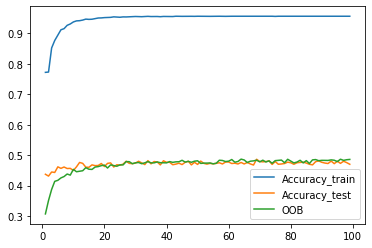

In [35]:
rf_result.plot()

<h4> Обучим Random Forest с 20 деревьями </h4>

In [37]:
classifier = ensemble.RandomForestClassifier(n_estimators=20, oob_score = True)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [43]:
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)} ; Test accuracy: {accuracy_score(y_test, y_pred_test)}")

Train accuracy: 0.953851261620186 ; Test accuracy: 0.4681274900398406


In [45]:
importances = classifier.feature_importances_

In [48]:
features = X_train.columns

In [49]:
features

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Family_Size', 'Artist', 'Doctor', 'Engineer', 'Entertainment',
       'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing',
       'Average', 'High', 'Low', 'Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5',
       'Cat_6', 'Cat_7'],
      dtype='object')

In [46]:
print(importances)

[0.0398191  0.02743484 0.36287037 0.03709259 0.14912161 0.11577917
 0.03094218 0.01165287 0.01204871 0.01366435 0.008207   0.0409237
 0.00718179 0.00693185 0.00974903 0.01644768 0.00678007 0.02858472
 0.00557616 0.01068354 0.01348902 0.0149288  0.00379524 0.01971843
 0.0065772 ]


([<matplotlib.axis.XTick at 0x1e98bf44080>,
 <a list of 25 Text xticklabel objects>)

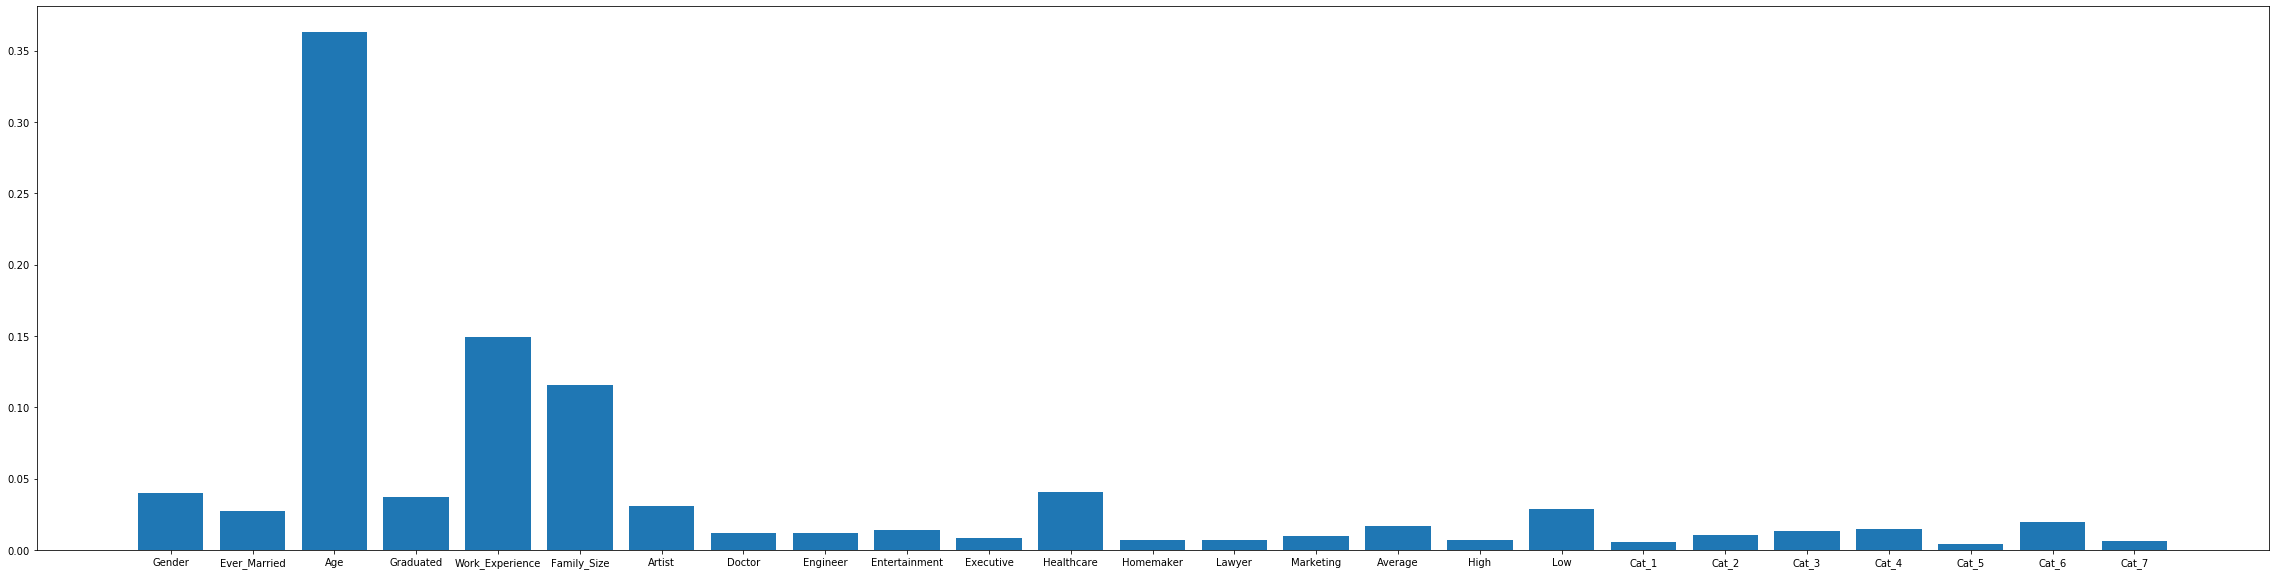

In [56]:
plt.figure(figsize=(40,10))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), features)

<h2> Gradient Boosting Classifier </h2>

In [100]:
gb_result = pd.DataFrame(index=n_trees, columns=["Accuracy_train", "Accuracy_test"])

In [101]:
for n in n_trees:
    classifier = ensemble.GradientBoostingClassifier(n_estimators=n)
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train.values)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    y_pred_test = classifier.predict(X_test.values)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    metrics = pd.Series({"Accuracy_train" : accuracy_train, "Accuracy_test" : accuracy_test}, name = n)
    gb_result.loc[n] = metrics

In [102]:
gb_result.max()

Accuracy_train    0.593127
Accuracy_test     0.537351
dtype: float64

In [103]:
gb_result.min()

Accuracy_train    0.416833
Accuracy_test     0.431773
dtype: float64

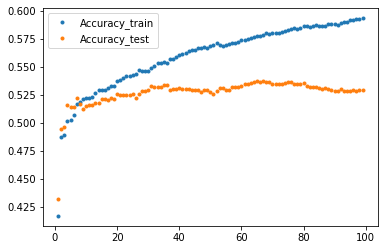

In [104]:
gb_result.plot(style='.')

In [105]:
classifier = ensemble.GradientBoostingClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [106]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [107]:
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)} ; Test accuracy: {accuracy_score(y_test, y_pred_test)}")

Train accuracy: 0.5371845949535192 ; Test accuracy: 0.5258964143426295


In [108]:
importances = classifier.feature_importances_

([<matplotlib.axis.XTick at 0x1e98d7169b0>,
 <a list of 25 Text xticklabel objects>)

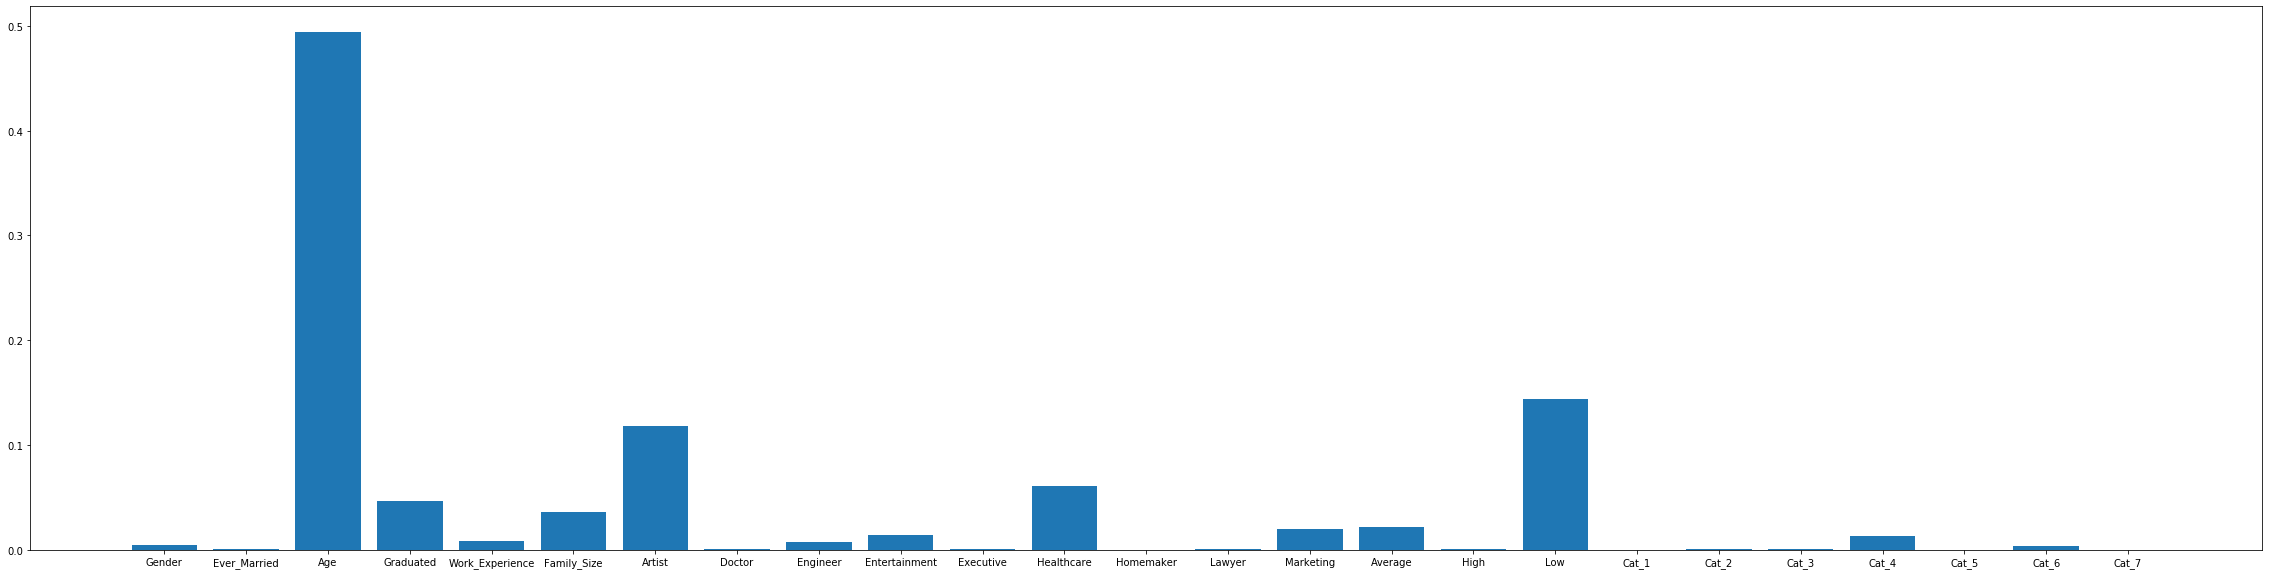

In [109]:
plt.figure(figsize=(40,10))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), features)

Вывод: сравнивая с предыдущими методами классификации, KNN показал лучший результ (63%)